In [3]:
import os
print(os.getcwd())

c:\Users\Arnav\Desktop\hr-analytics-job-change\notebooks


In [5]:
import pandas as pd

# Correct relative paths from notebooks/ folder to data/
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
test_target = pd.read_csv('../data/test_target.csv')

# Preview the training data
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
# Shape of datasets
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Test target shape:", test_target.shape)

# Basic info
train_df.info()

# Check for missing values
missing_values = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])


Train shape: (19158, 14)
Test shape: (2129, 13)
Test target shape: (2129, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target        

In [7]:
# Recheck missing values
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train_df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage
company_type,6140,32.049274
company_size,5938,30.994885
gender,4508,23.530640
major_discipline,2813,14.683161
education_level,460,2.401086
last_new_job,423,2.207955
enrolled_university,386,2.014824
experience,65,0.339284


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\3010200071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")


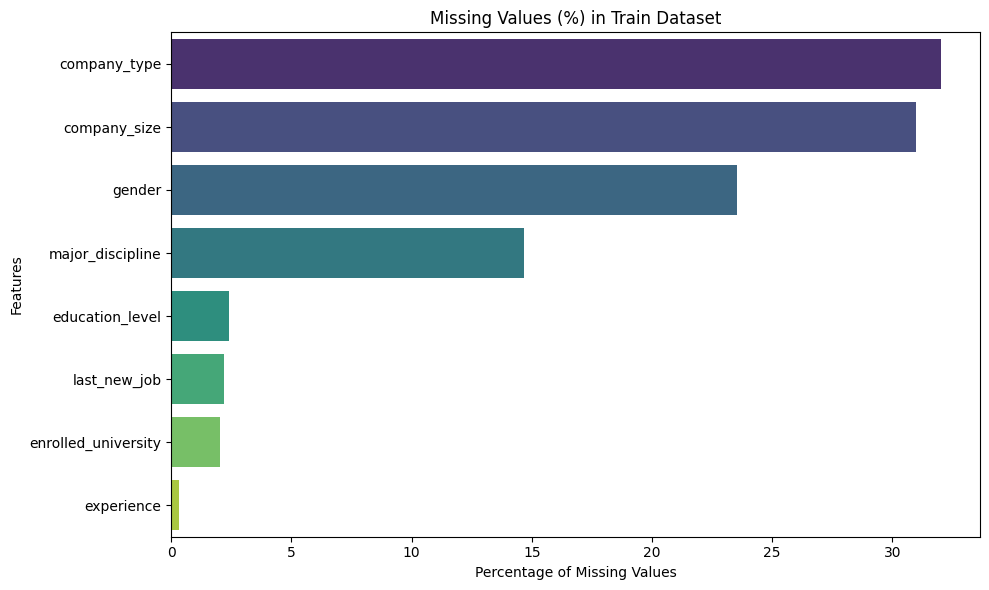

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv("../data/train.csv")

# Calculate missing value percentages
missing_values = train_df.isnull().mean().sort_values(ascending=False) * 100
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title("Missing Values (%) in Train Dataset")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\119122425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='target', palette='Set2')


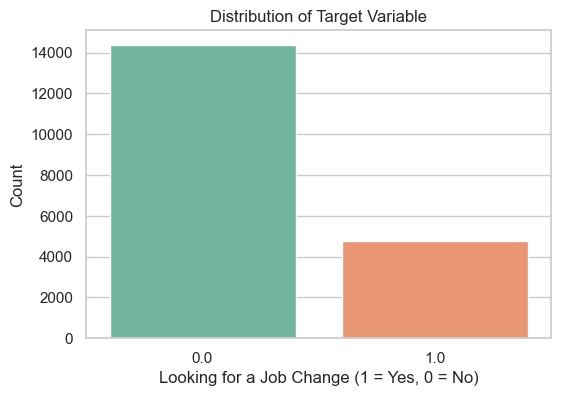

target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='target', palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Looking for a Job Change (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Percentage distribution
target_counts = train_df['target'].value_counts(normalize=True) * 100
print(target_counts)


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\1124949420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, ax=axes[idx], palette='pastel', order=train_df[col].value_counts().index)
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\1124949420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=col, ax=axes[idx], palette='pastel', order=train_df[col].value_counts().index)
C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\1124949420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train

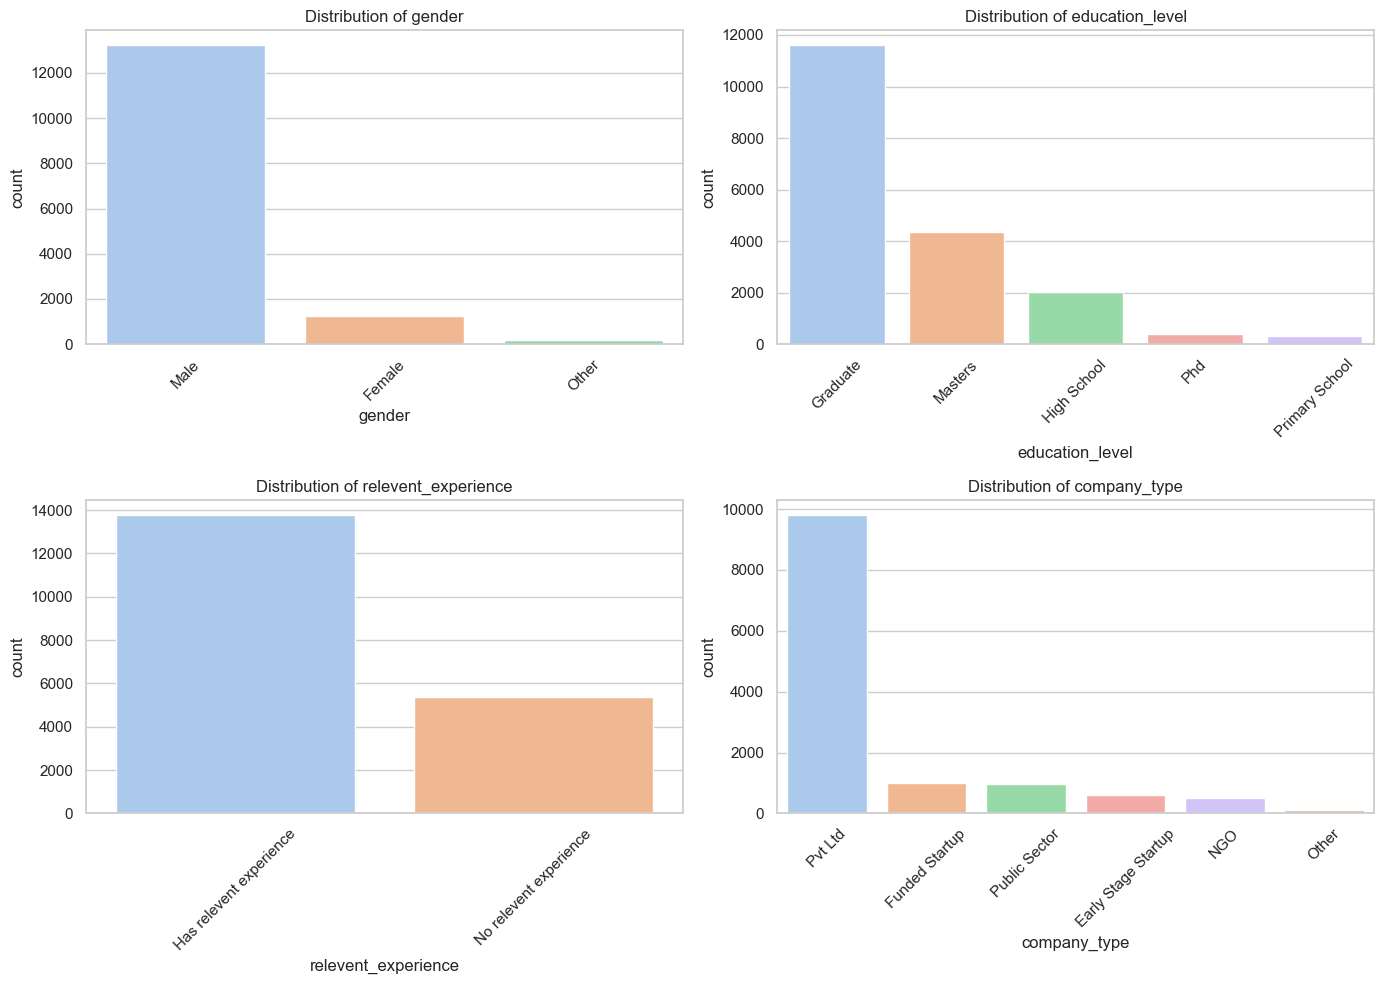

In [12]:
categorical_cols = ['gender', 'education_level', 'relevent_experience', 'company_type']

# Plotting each in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=train_df, x=col, ax=axes[idx], palette='pastel', order=train_df[col].value_counts().index)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


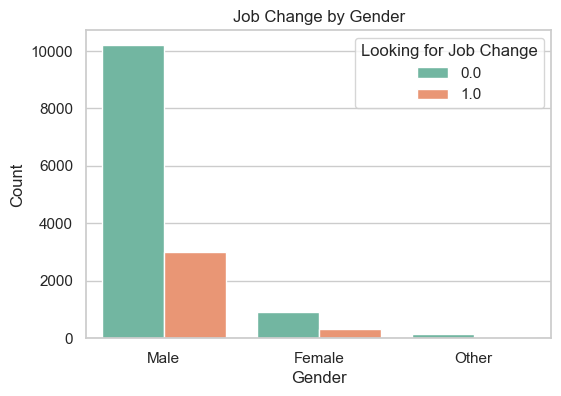

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='gender', hue='target', palette='Set2')
plt.title('Job Change by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Looking for Job Change')
plt.show()


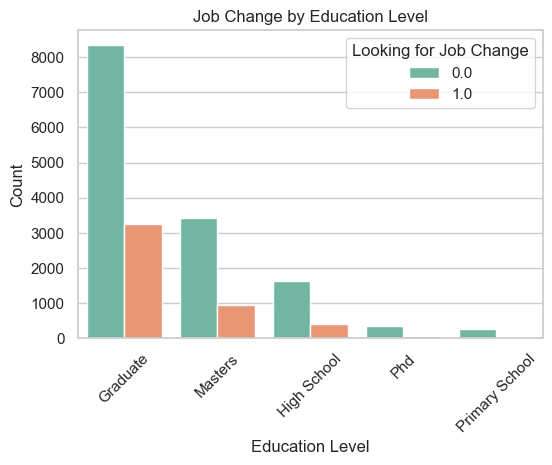

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='education_level', hue='target', palette='Set2')
plt.title('Job Change by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Looking for Job Change')
plt.xticks(rotation=45)
plt.show()


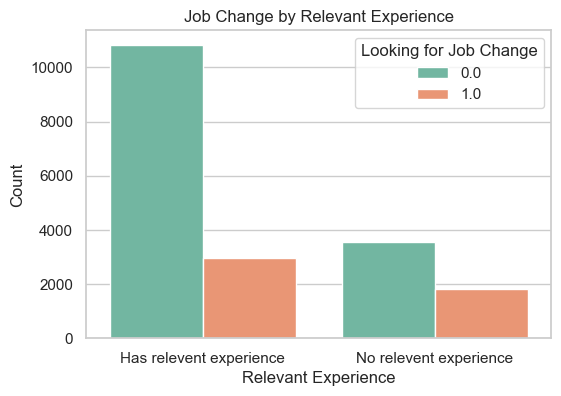

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='relevent_experience', hue='target', palette='Set2')
plt.title('Job Change by Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.legend(title='Looking for Job Change')
plt.show()


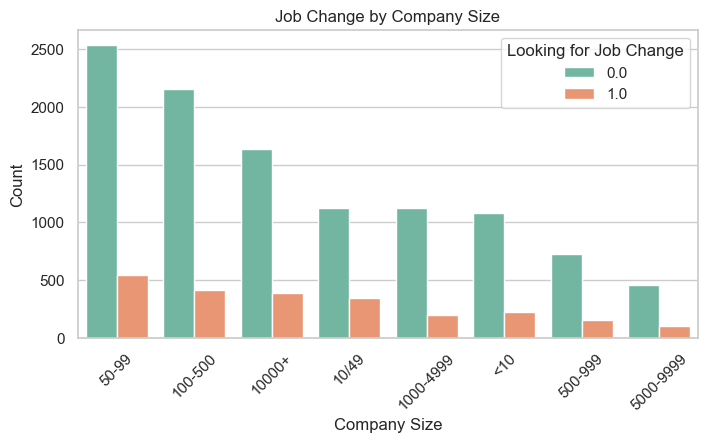

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(data=train_df, x='company_size', hue='target', palette='Set2', order=train_df['company_size'].value_counts().index)
plt.title('Job Change by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.legend(title='Looking for Job Change')
plt.xticks(rotation=45)
plt.show()


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\2006426211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='target', y='city_development_index', palette='Set3')


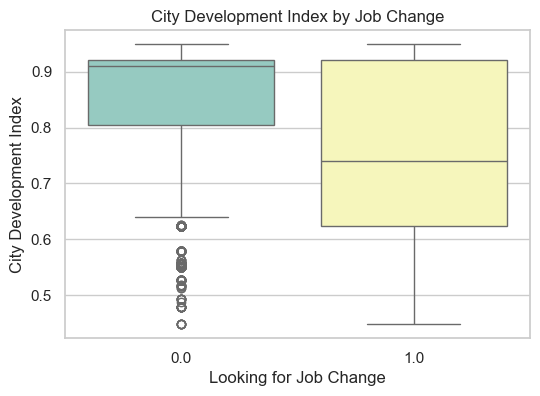

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='target', y='city_development_index', palette='Set3')
plt.title('City Development Index by Job Change')
plt.xlabel('Looking for Job Change')
plt.ylabel('City Development Index')
plt.show()


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\3800503643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='target', y='training_hours', palette='Set3')


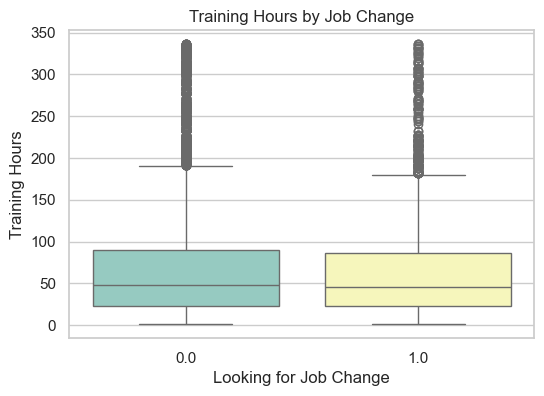

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='target', y='training_hours', palette='Set3')
plt.title('Training Hours by Job Change')
plt.xlabel('Looking for Job Change')
plt.ylabel('Training Hours')
plt.show()


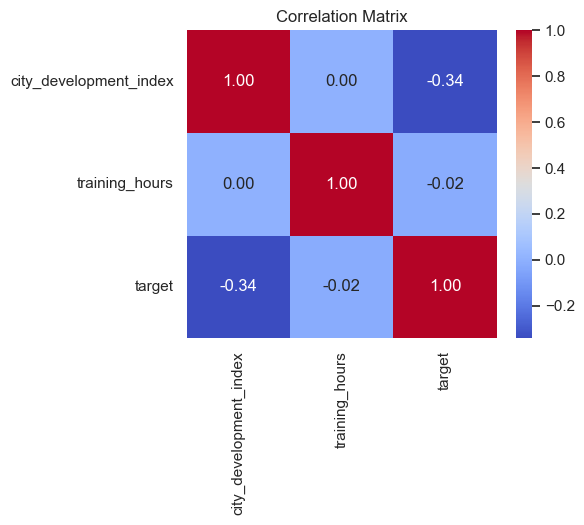

In [19]:
# Correlation matrix
num_features = ['city_development_index', 'training_hours', 'target']
corr_matrix = train_df[num_features].corr()

# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


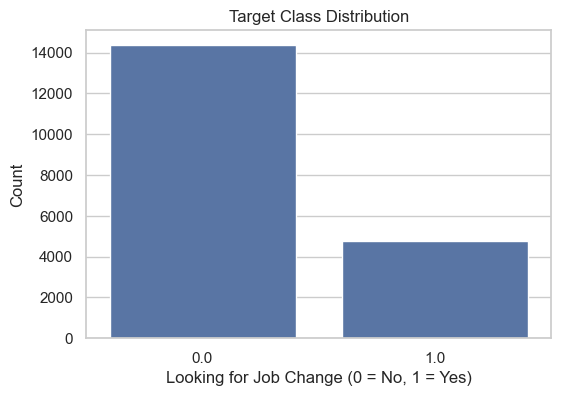

Class Distribution (as %):
target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64


In [20]:
# Value counts of target
class_counts = train_df['target'].value_counts(normalize=True)

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='target')
plt.title('Target Class Distribution')
plt.xlabel('Looking for Job Change (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Print proportions
print("Class Distribution (as %):")
print(class_counts * 100)


In [22]:
import numpy as np

In [23]:
def clean_experience(x):
    if x == '>20':
        return 21
    elif x == '<1':
        return 0
    else:
        try:
            return int(x)
        except:
            return np.nan

train_df['experience'] = train_df['experience'].apply(clean_experience)
test_df['experience'] = test_df['experience'].apply(clean_experience)


In [24]:
def clean_last_new_job(x):
    if x == '>4':
        return 5
    elif x == '<1':
        return 0
    elif x == 'never':
        return -1
    else:
        try:
            return int(x)
        except:
            return np.nan

train_df['last_new_job'] = train_df['last_new_job'].apply(clean_last_new_job)
test_df['last_new_job'] = test_df['last_new_job'].apply(clean_last_new_job)


In [25]:
# Categorical columns
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:\n", cat_cols)


Categorical Columns:
 ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']


In [27]:
from sklearn.preprocessing import LabelEncoder

# Copy datasets
train_fe = train_df.copy()
test_fe = test_df.copy()

# Label Encode binary categorical features
label_enc_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                  'major_discipline', 'company_size', 'company_type']

le = LabelEncoder()
for col in label_enc_cols:
    train_fe[col] = le.fit_transform(train_fe[col].astype(str))
    test_fe[col] = le.transform(test_fe[col].astype(str))

# Frequency Encoding for high cardinality feature 'city'
city_freq = train_fe['city'].value_counts(normalize=True)
train_fe['city_freq'] = train_fe['city'].map(city_freq)
test_fe['city_freq'] = test_fe['city'].map(city_freq)

# Drop the original 'city' column
train_fe.drop('city', axis=1, inplace=True)
test_fe.drop('city', axis=1, inplace=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

# Copy datasets
train_fe = train_df.copy()
test_fe = test_df.copy()

# Initialize encoder
le = LabelEncoder()

# Encode each categorical column
categorical_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'company_size', 'company_type']

for col in categorical_cols:
    # Combine train and test data for consistent encoding
    combined_data = pd.concat([train_fe[col], test_fe[col]], axis=0)
    le.fit(combined_data.astype(str))
    
    train_fe[col] = le.transform(train_fe[col].astype(str))
    test_fe[col] = le.transform(test_fe[col].astype(str))


In [29]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_fe.drop(columns=['target', 'enrollee_id'])
y = train_fe['target']

# Split for model validation (80/20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_valid)

# Evaluation
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2877
         1.0       0.57      0.50      0.54       955

    accuracy                           0.78      3832
   macro avg       0.71      0.69      0.70      3832
weighted avg       0.77      0.78      0.78      3832

Confusion Matrix:
 [[2518  359]
 [ 475  480]]


In [31]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      2877
         1.0       0.57      0.47      0.52       955

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832

Confusion Matrix:
 [[2543  334]
 [ 506  449]]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model with class weights
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# Predict on validation set
y_pred_balanced = rf_balanced.predict(X_valid)

# Evaluate
print("Classification Report:\n", classification_report(y_valid, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_balanced))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      2877
         1.0       0.57      0.47      0.52       955

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.77      3832

Confusion Matrix:
 [[2543  334]
 [ 506  449]]


C:\Users\Arnav\AppData\Local\Temp\ipykernel_11780\760003901.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')


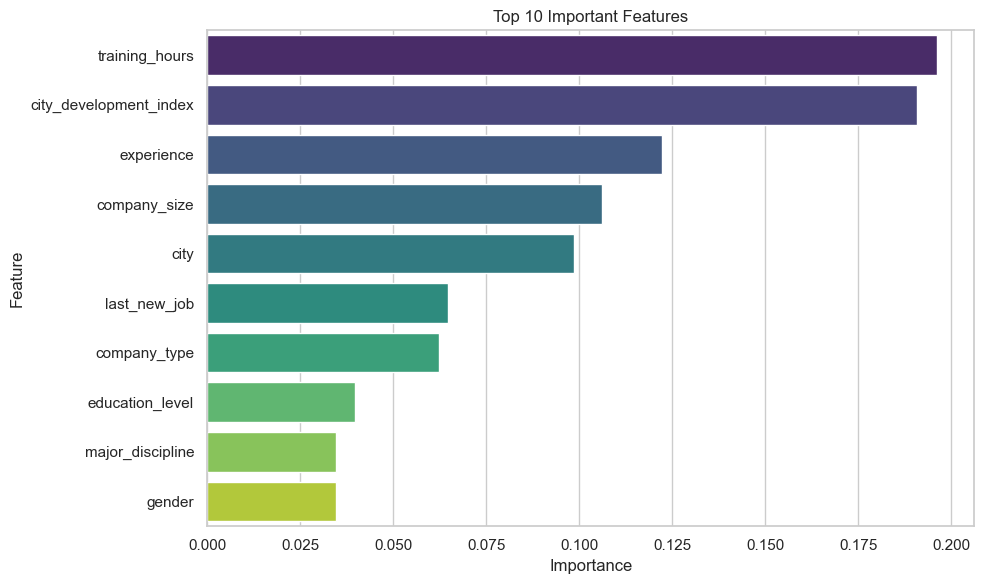

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_balanced.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


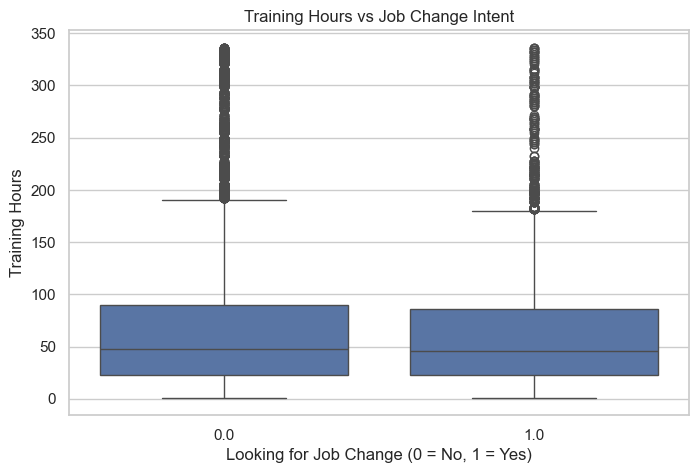

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='training_hours', data=train_df)
plt.title("Training Hours vs Job Change Intent")
plt.xlabel("Looking for Job Change (0 = No, 1 = Yes)")
plt.ylabel("Training Hours")
plt.show()


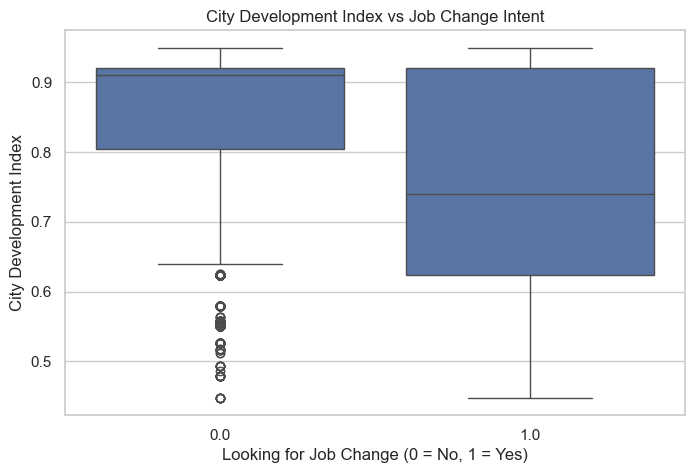

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='city_development_index', data=train_df)
plt.title("City Development Index vs Job Change Intent")
plt.xlabel("Looking for Job Change (0 = No, 1 = Yes)")
plt.ylabel("City Development Index")
plt.show()


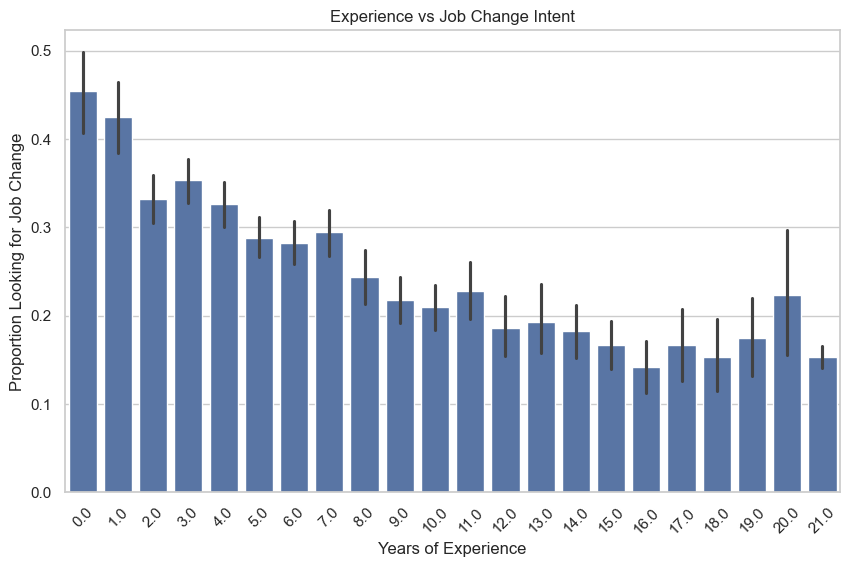

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='experience', y='target', data=train_df)
plt.title("Experience vs Job Change Intent")
plt.xlabel("Years of Experience")
plt.ylabel("Proportion Looking for Job Change")
plt.xticks(rotation=45)
plt.show()


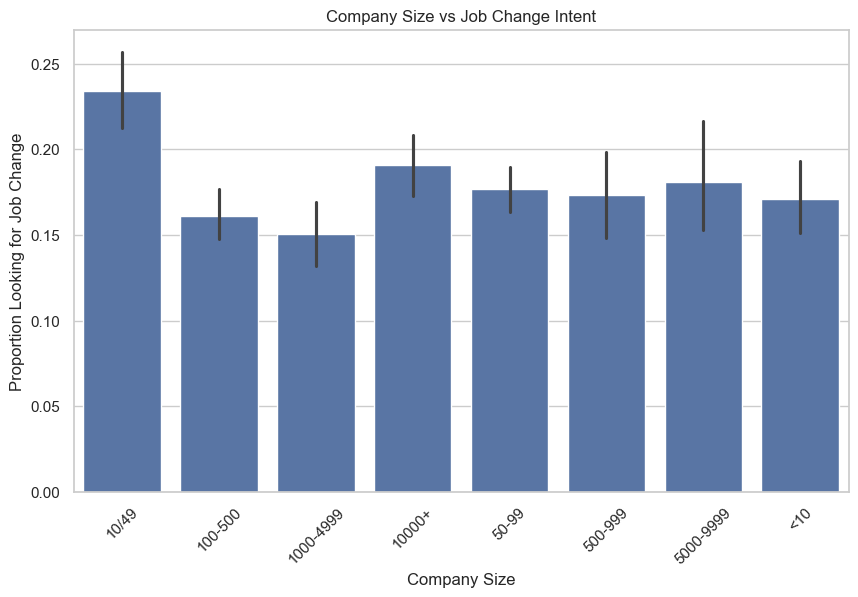

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='target', data=train_df, order=sorted(train_df['company_size'].dropna().unique()))
plt.title("Company Size vs Job Change Intent")
plt.xlabel("Company Size")
plt.ylabel("Proportion Looking for Job Change")
plt.xticks(rotation=45)
plt.show()


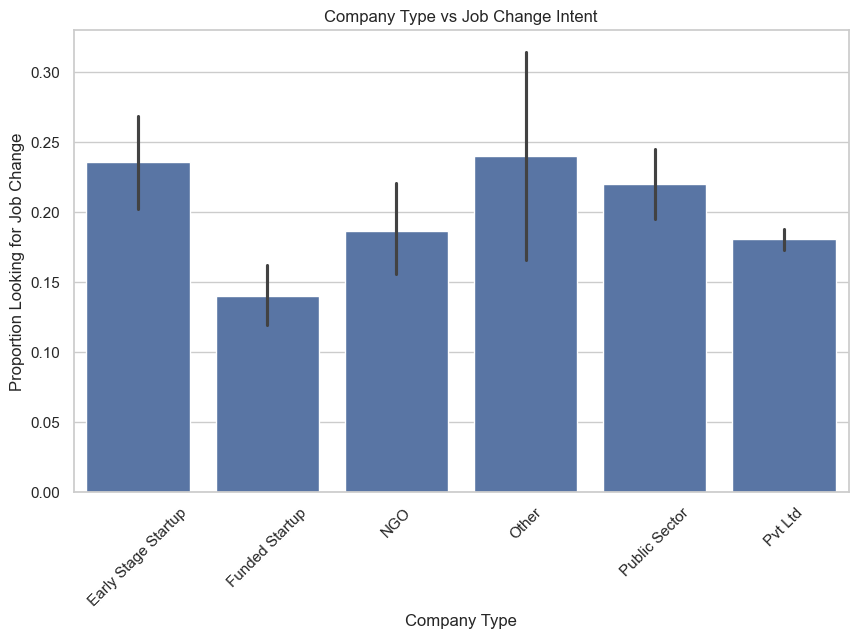

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_type', y='target', data=train_df, order=sorted(train_df['company_type'].dropna().unique()))
plt.title("Company Type vs Job Change Intent")
plt.xlabel("Company Type")
plt.ylabel("Proportion Looking for Job Change")
plt.xticks(rotation=45)
plt.show()
